In [14]:
import torch 
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from generator import Generator
import math
from torchvision import transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image_size = 256
batch_size = 16

transformer = transforms.Compose([
	transforms.Resize((image_size, image_size)),
	transforms.ToTensor() # ToTensor() changes the range of the values from [0, 255] to [0.0, 1.0]
])

# Real images
photo_dataset = ImageFolder('../data/photos/', transformer)
len_training_set = math.floor(len(photo_dataset) * 0.9)
len_valid_set = len(photo_dataset) - len_training_set
training_set, validation_set = random_split(photo_dataset, (len_training_set, len_valid_set))
photo_dataloader_train = DataLoader(training_set, batch_size, shuffle=True, num_workers=0)
photo_dataloader_valid = DataLoader(validation_set, batch_size, shuffle=True, num_workers=0)

In [5]:
photo_dataset[4][0].shape

torch.Size([3, 256, 256])

In [8]:
device = torch.device('cpu')

# if torch.cuda.is_available():
# 	device = torch.device('cuda')
# else:
# 	print("No cuda available")

In [9]:
checkpoint_dir = '../data/models/checkpoints'
checkpoint = torch.load(checkpoint_dir + '/best_checkpoint.pth', map_location=torch.device(device))
G_inference = Generator()
G_inference.load_state_dict(checkpoint['g_state_dict'])

<All keys matched successfully>

In [10]:
test_images = iter(photo_dataloader_valid).next()[0]
result_images_best_checkpoint = G_inference(test_images)

In [12]:
result_images_best_checkpoint.shape

torch.Size([16, 3, 256, 256])

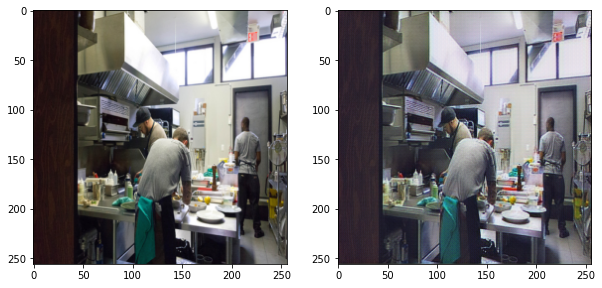

In [29]:
img_idx = 3

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(np.transpose(test_images[img_idx].detach().numpy(), (1, 2, 0)))
plt.subplot(1,2,2)
plt.imshow(np.transpose(result_images_best_checkpoint[img_idx].detach().numpy(), (1, 2, 0)))